## Initialization

#### Jupyter Settings

In [2]:

# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html#module-IPython.extensions.autoreload
%load_ext autoreload
%autoreload 2

# https://matplotlib.org/stable/users/explain/backends.html
# https://github.com/microsoft/vscode-jupyter/wiki/Using-%25matplotlib-widget-instead-of-%25matplotlib-notebook,tk,etc
# For zoomable plot
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import

In [3]:
import h5py
from ann_benchmarks import results
import matplotlib.pyplot as plt
from collections import defaultdict
from ann_benchmarks.plotting.utils import compute_metrics
from ann_benchmarks.datasets import get_dataset
from ann_benchmarks.plotting.utils import create_linestyles
import numpy as np
import sklearn.metrics
import re

In [19]:

def plot(dataset, m, hc):
    res = results.load_all_results(dataset = dataset, count=100,batch_mode=False)
    true_dist = np.array(get_dataset(dataset)[0]["distances"])[:1000]
    dim = np.array(get_dataset(dataset)[0]["train"]).shape[-1]
    n_bits = int(dim*m)

    compute_metrics(true_dist, res, "all-k-recalls", "all-k-precisions", True)
    res.close()

    matrics = defaultdict(lambda: defaultdict())

    algo_name_maps = {
        "simHash": "Lsh(m={m})",
        "SB-LSH(Faiss)": "FaissLSH(n_bits={n_bits})",
        "USR-LSH": "Usr(m={m},T=16)",
    }

    for properties, f in results.load_all_results(dataset = dataset, count=100, batch_mode=False):
        if algo_name_maps[properties['algo']].format(m=m, n_bits=n_bits) != properties['name']:
            continue

        name = properties['name']
        matrics[name]['algo'] = properties['algo']
        matrics[name]['recalls'] = f['metrics']['all-k-recalls']['all-k-recalls'][:]
        matrics[name]['precisions'] = f['metrics']['all-k-precisions']['all-k-precisions'][:]
    
    plt.clf()
    plt.figure(figsize=(12, 9))
    
    plt.grid(b=True, which='major', color='0.65', linestyle='-')
    axs = plt.gca()
    axs.set_title(f"Hash Code Dimension = {n_bits}" ,fontsize = 24)

    hardcode_linestyles = {
        "USR-LSH": ("orangered", "-", "o"),
        "SB-LSH(Faiss)": ("mediumpurple", "--", "x"),
        "simHash": ("Skyblue", "--", "^"),
    }

    def mean_y(algo):
        return -np.log(np.array(algo[1]["precisions"])).mean()

    auc = {}

    for name, matric in sorted(matrics.items(), key=mean_y):

        color, linestyle, marker = hardcode_linestyles[matric['algo']]

        r = matric["recalls"]
        p = matric["precisions"]
        auc[matric['algo']] = sklearn.metrics.auc(r, p)

        l = axs.plot(r, p, label=matric['algo'], color=color, linestyle=linestyle, lw=3)

        axs.set_xlabel('Recall', fontsize=22, labelpad=6)
        axs.set_ylabel('Precision', fontsize=22, labelpad=6)

    if hc == "low":
        legend_loc = "upper right"
    else:
        legend_loc = "lower left"

    leg = axs.legend(loc=legend_loc, prop={'size': 26})

    plt.savefig(f"plots/pr/{dataset}.n={n_bits}.eps", bbox_inches='tight', format='eps')
    # plt.show()
    return auc

Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 


/tmp/ipykernel_2197/1387234377.py:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='0.65', linestyle='-')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 
Computing all K`s recalls 
Computing all K`s precisions 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


defaultdict(<function <lambda> at 0x7fad7a94f940>, {'USR-LSH': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fad740d81f0>, {'low': defaultdict(None, {'deep-image-96-angular': 0.14417210626932322, 'sift-128-euclidean': 0.15124104493529536, 'glove-100-angular': 0.14369288945670083, 'glove-25-angular': 0.04700480102581369}), 'high': defaultdict(None, {'deep-image-96-angular': 0.5517712935577662, 'sift-128-euclidean': 0.6835944976444331, 'glove-100-angular': 0.7367756756170246, 'glove-25-angular': 0.6060424583502504})}), 'SB-LSH(Faiss)': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fad7af78280>, {'low': defaultdict(None, {'deep-image-96-angular': 0.11181372558649393, 'sift-128-euclidean': 0.11095936271520959, 'glove-100-angular': 0.11472480091600105, 'glove-25-angular': 0.02684719308623746}), 'high': defaultdict(None, {'deep-image-96-angular': 0.4514425085038605, 'sift-128-euclidean': 0.6338049874161479, 'glove-100-angular': 0.655537878026634, 'glove-25-angular': 0.49793

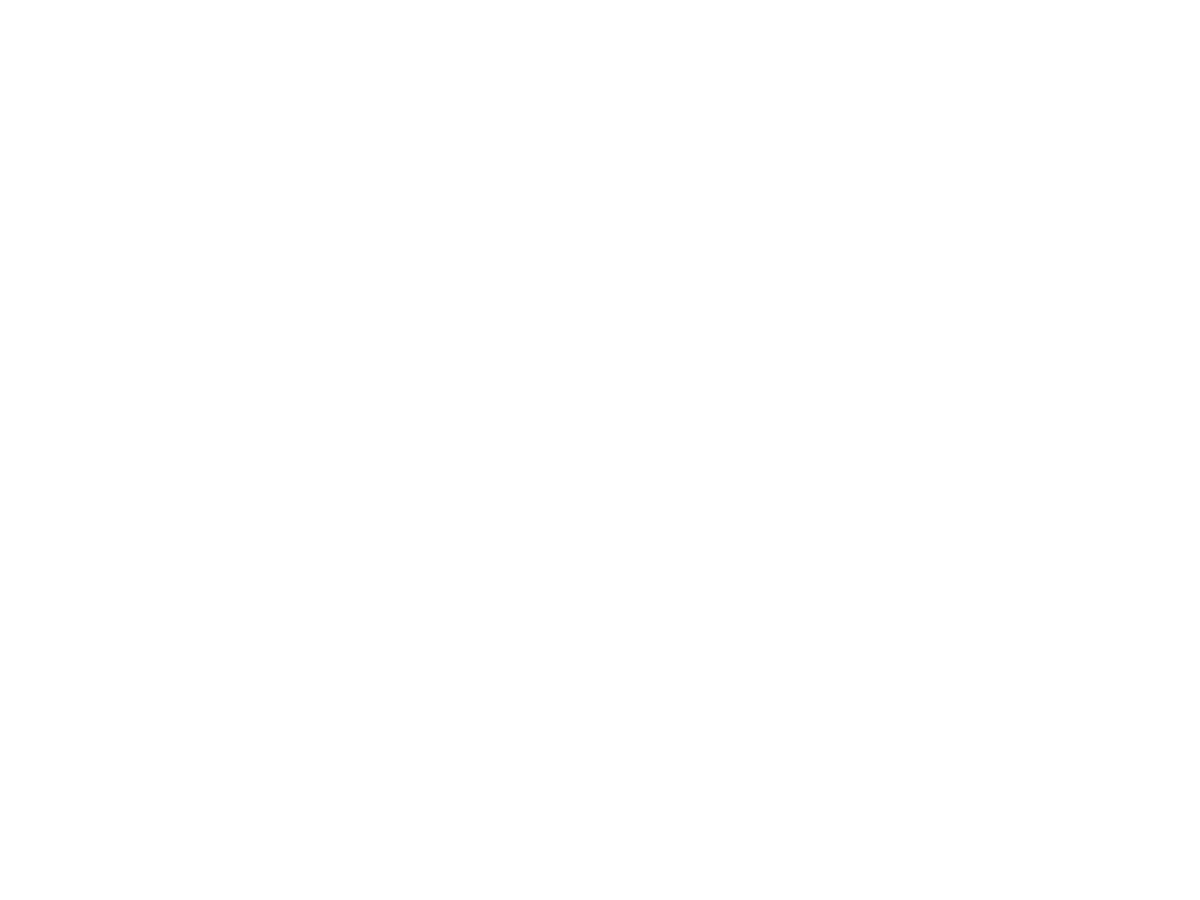

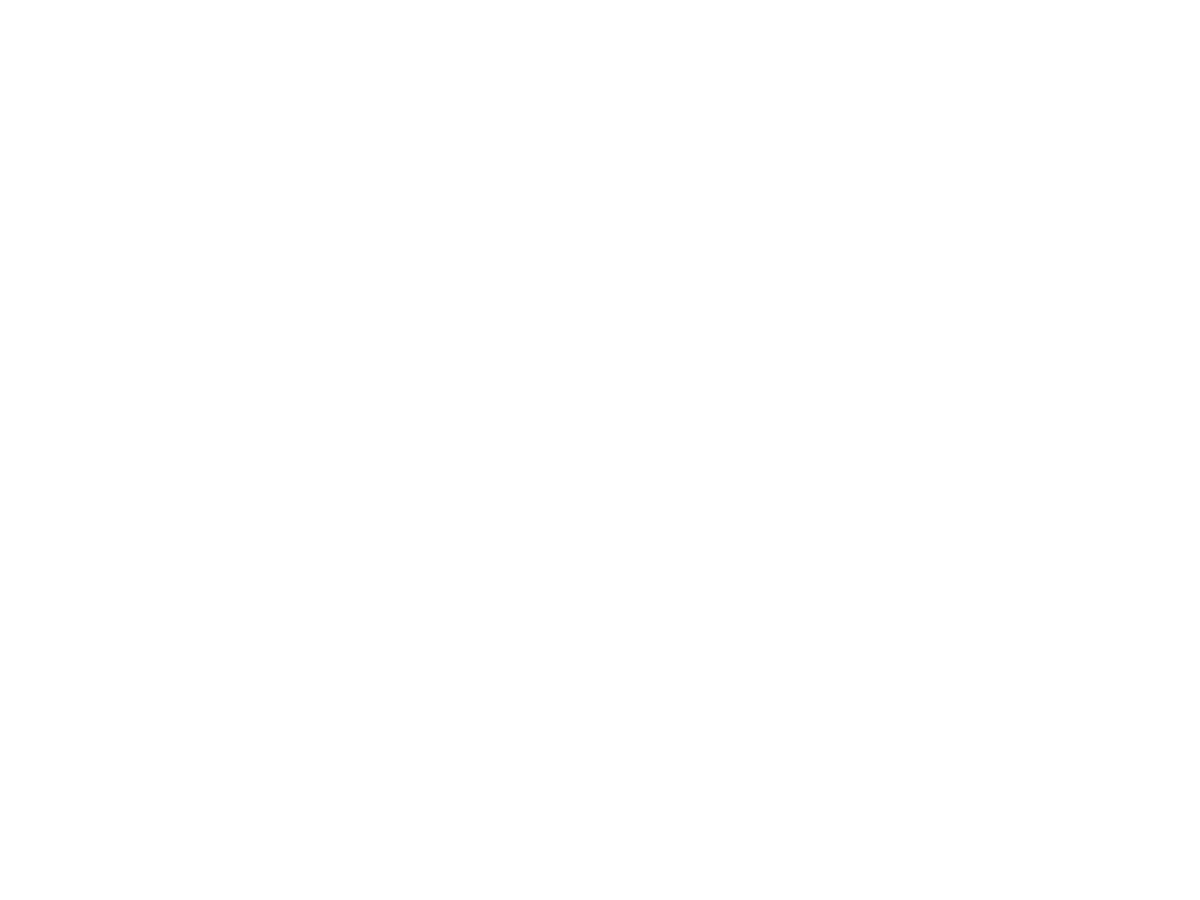

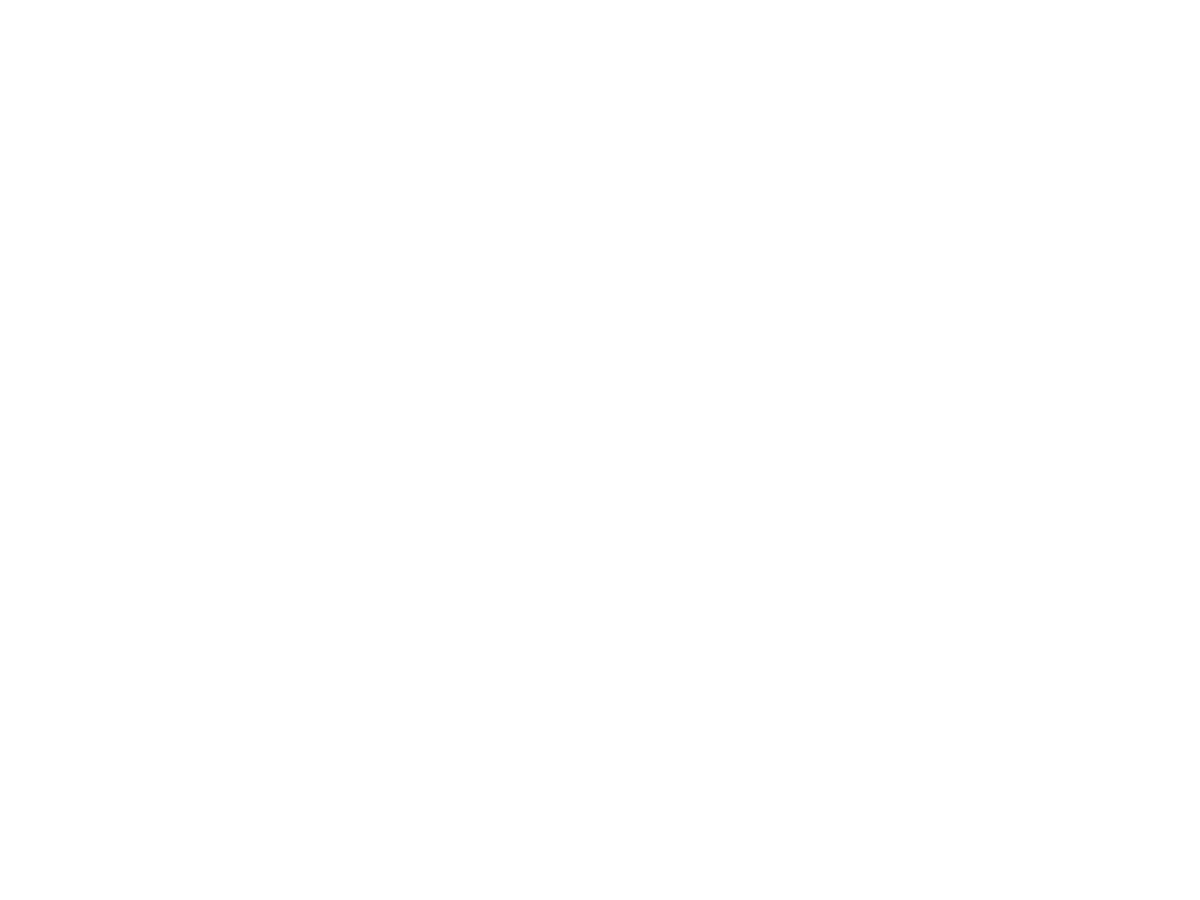

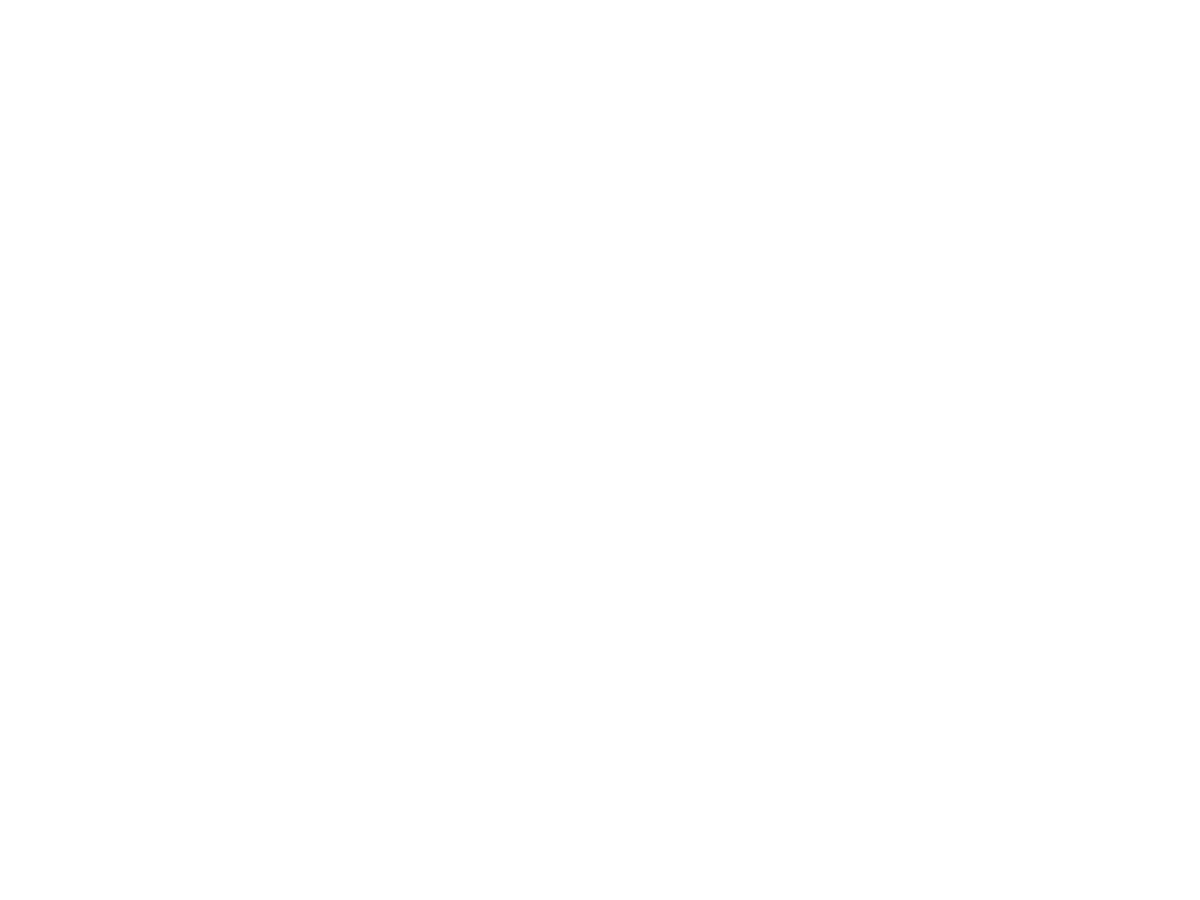

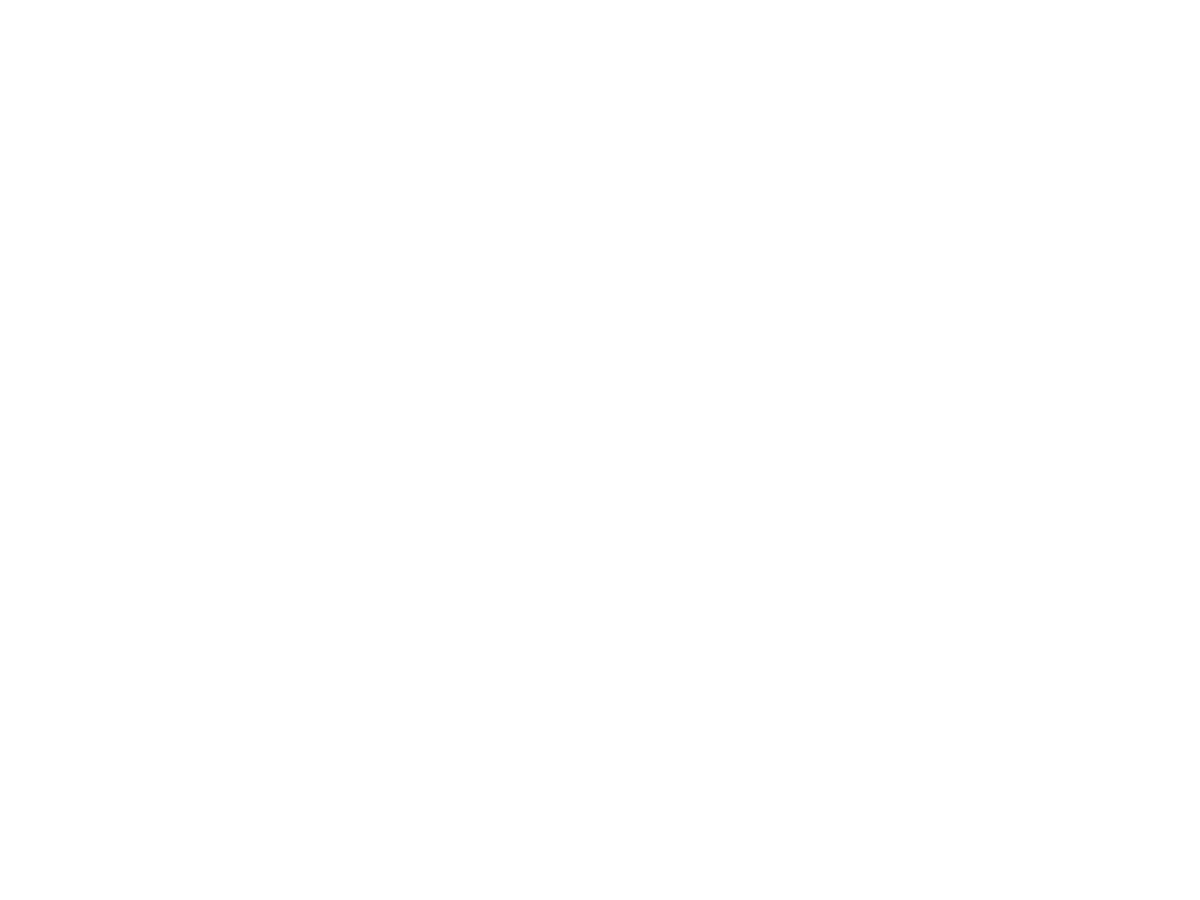

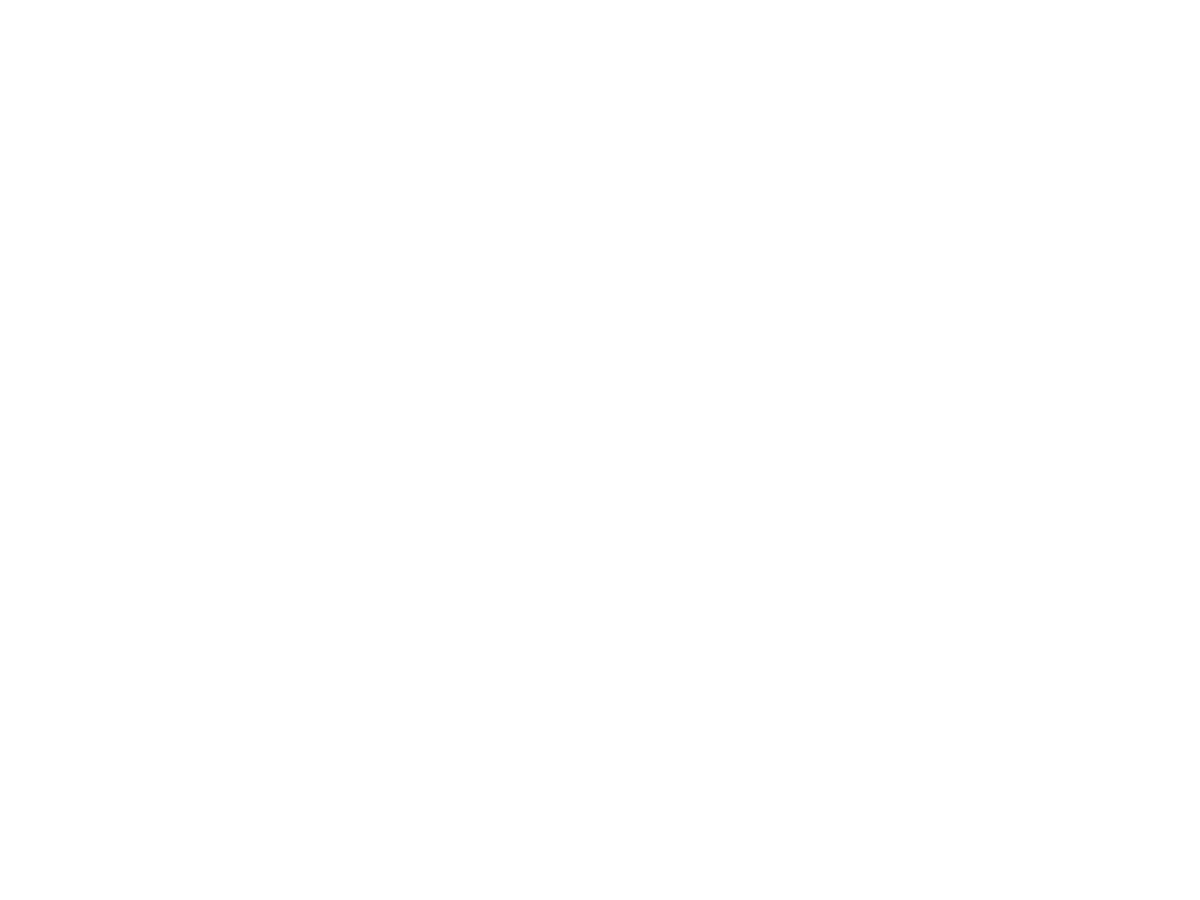

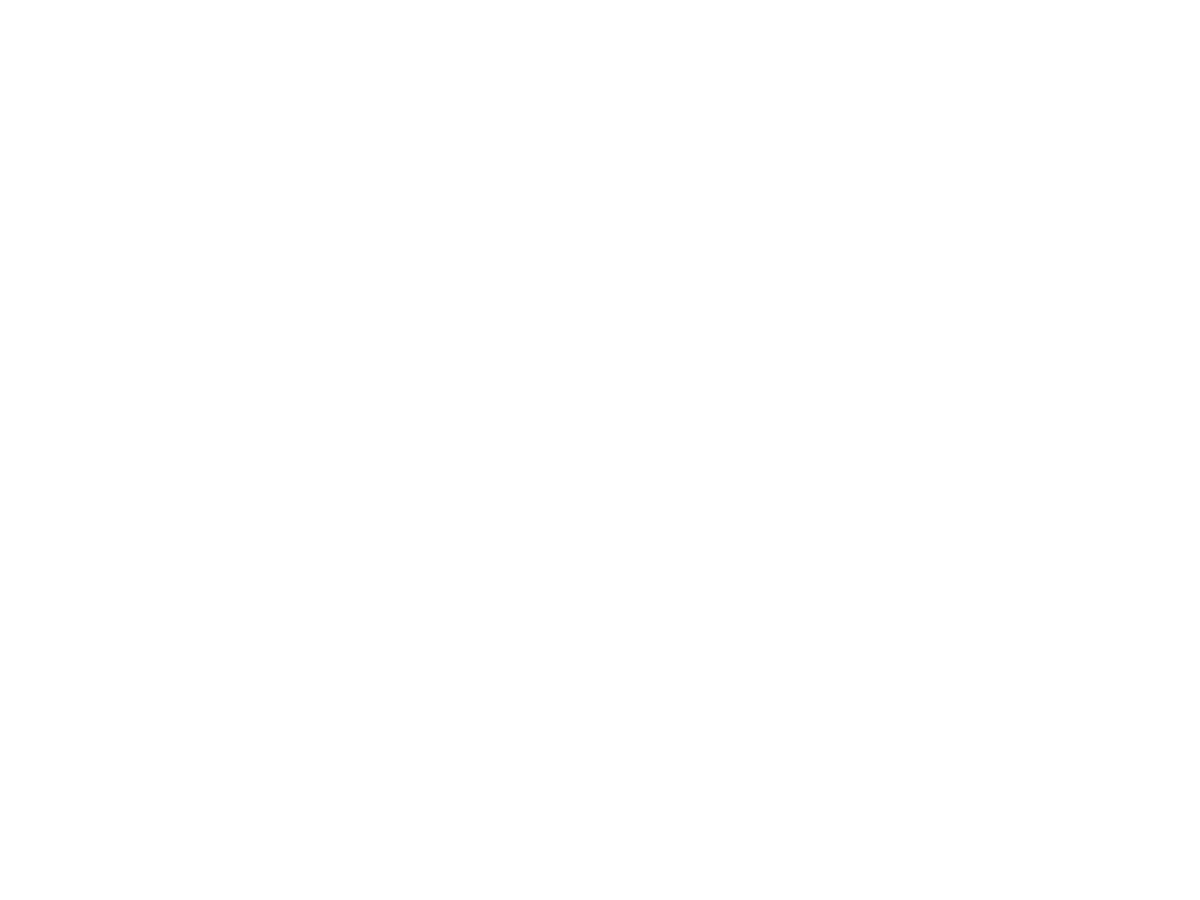

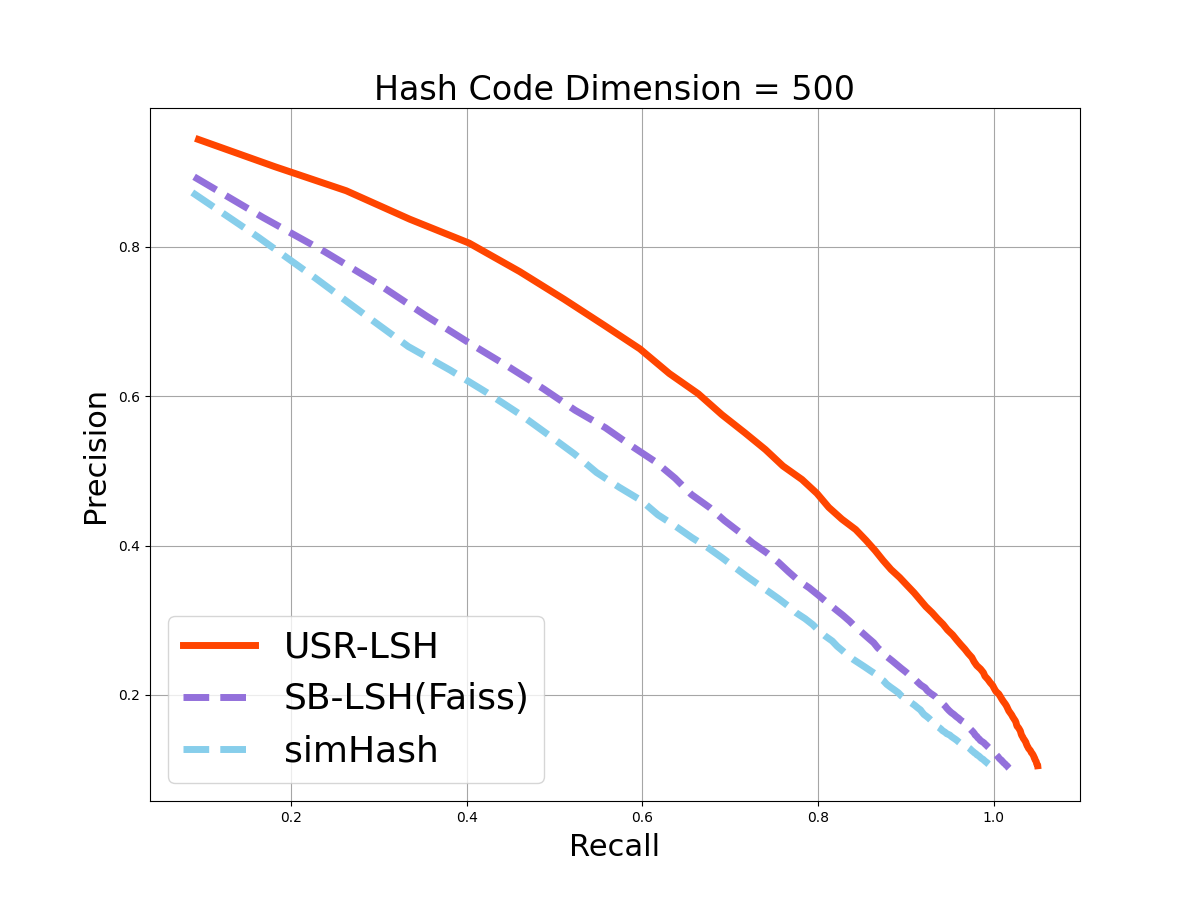

In [20]:
plot_args = [
    ("deep-image-96-angular", 2, "low"), ("deep-image-96-angular", 8, "high"),
    ("sift-128-euclidean", 2, "low"), ("sift-128-euclidean", 20, "high"),
    ("glove-100-angular", 2, "low"), ("glove-100-angular", 20, "high"),
    ("glove-25-angular", 2, "low"), ("glove-25-angular", 20, "high"), 
]

# plot_args = [("deep-image-96-angular", 2, "low")]

all_aucs = defaultdict(lambda: defaultdict(lambda: defaultdict()))
auc_baseline = defaultdict(lambda: defaultdict())
improve = defaultdict(lambda: defaultdict(lambda: defaultdict()))

for p in plot_args:
    aucs = plot(dataset=p[0], m=p[1], hc=p[2])
    for algo, auc in aucs.items():
        all_aucs[algo][p[2]][p[0]] = auc
        if algo == "simHash":
            auc_baseline[p[2]][p[0]] = auc

print(all_aucs)


In [69]:
improves = defaultdict(lambda: defaultdict(lambda: defaultdict()))
for algo, aucs in all_aucs.items():
    for b, auc in aucs.items():
        l = []
        for data, a in auc.items():
            bl = auc_baseline[b][data]
            improve = (a-bl)/bl
            improves[algo][b][data] = improve
            l.append(f"{a:.3f} (+{improve*100:.2f}%)")
        print(f"{algo}, {b}:")
        print(*l, sep=" & ") # print for Latex

USR-LSH, low:
0.144 (+91.67%) & 0.151 (+82.05%) & 0.144 (+123.15%) & 0.047 (+225.16%)
USR-LSH, high:
0.552 (+41.42%) & 0.684 (+12.55%) & 0.737 (+25.39%) & 0.606 (+33.35%)
SB-LSH(Faiss), low:
0.112 (+48.65%) & 0.111 (+33.56%) & 0.115 (+78.16%) & 0.027 (+85.72%)
SB-LSH(Faiss), high:
0.451 (+15.71%) & 0.634 (+4.35%) & 0.656 (+11.56%) & 0.498 (+9.56%)
simHash, low:
0.075 (+0.00%) & 0.083 (+0.00%) & 0.064 (+0.00%) & 0.014 (+0.00%)
simHash, high:
0.390 (+0.00%) & 0.607 (+0.00%) & 0.588 (+0.00%) & 0.454 (+0.00%)


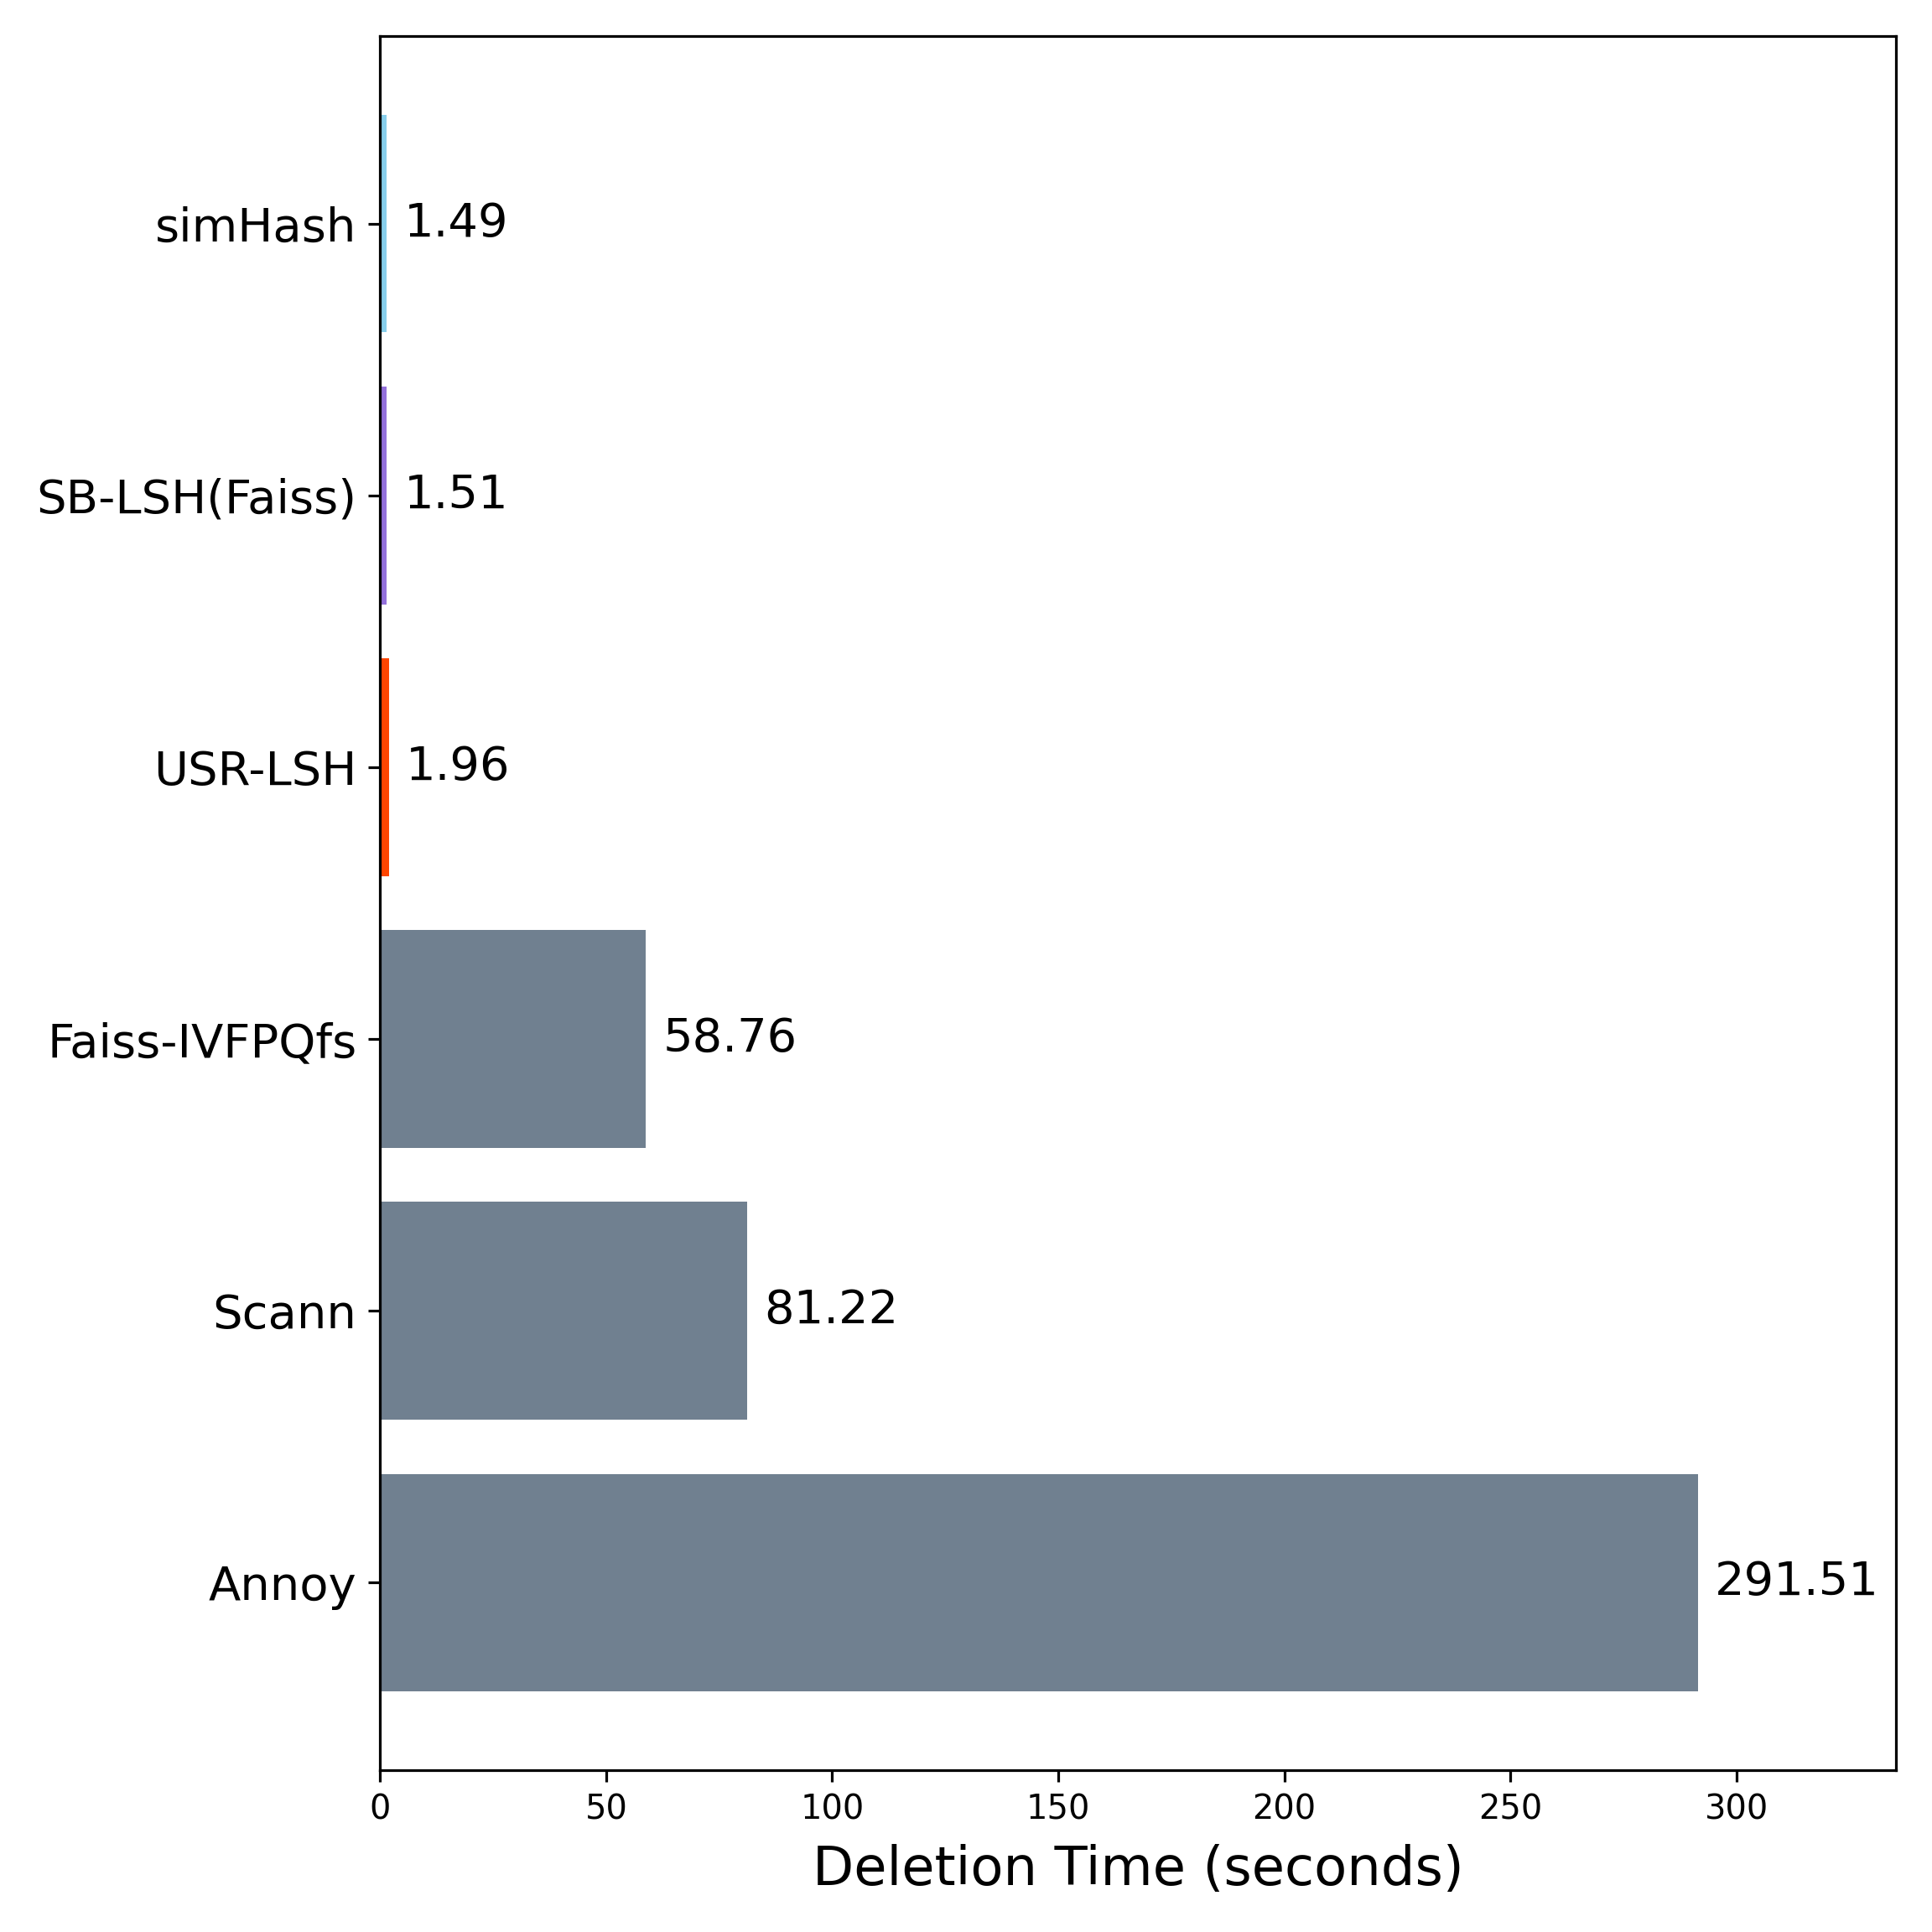

In [268]:
# Plot delete time

matrics = defaultdict(lambda: defaultdict())

dataset = "deep-image-96-angular"

for properties, f in results.load_all_results(dataset = dataset, count=1, batch_mode=False):
    matrics[properties['algo']]['delete_time'] = properties['delete_time']

# Sorting by mean y-value helps aligning plots with labels
def mean_y(algo):
    return -np.log(np.array(algo[1]["delete_time"])).mean()

hardcode_linestyles = {
    "USR-LSH": ("orangered", "-", "o"),
    "SB-LSH(Faiss)": ("mediumpurple", "--", "x"),
    "simHash": ("Skyblue", "--", "^"),
}

plt.clf()
axs = plt.gca()

for i, (algo, w) in enumerate(sorted(matrics.items(), key=mean_y)):

    if algo in hardcode_linestyles:
        color = hardcode_linestyles[algo][0]
    else:
        color = "slategrey"

    b = axs.barh(algo, w['delete_time'], color=color)
    axs.tick_params(axis='y', which='major', labelsize=14)
    bl = axs.bar_label(b, fmt='%.2f', padding=5, fontsize=14)

axs.margins(x=0.15)
axs.set_xlabel('Deletion Time (seconds)', fontsize=16, labelpad=5)

plt.tight_layout()
plt.savefig(f"plots/del/{dataset}.eps", bbox_inches='tight', format='eps')
plt.show()